<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Заполнение пропусков</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типов данных</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(10)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 23699 entries, 0 to 23698

Data columns (total 22 columns):

 #   Column                Non-Null Count  Dtype  

---  ------                --------------  -----  

 0   total_images          23699 non-null  int64  

 1   last_price            23699 non-null  float64

 2   total_area            23699 non-null  float64

 3   first_day_exposition  23699 non-null  object 

 4   rooms                 23699 non-null  int64  

 5   ceiling_height        14504 non-null  float64

 6   floors_total          23613 non-null  float64

 7   living_area           21796 non-null  float64

 8   floor                 23699 non-null  int64  

 9   is_apartment          2775 non-null   object 

 10  studio                23699 non-null  bool   

 11  open_plan             23699 non-null  bool   

 12  kitchen_area          21421 non-null  float64

 13  balcony               12180 non-null  float64

 14  locality_name         23650 non-null  object 

 15 

### Вывод

Первичный анализ данных о  объявлений о продаже квартир показал:
1. В таблице представлена информация: airports_nearest — расстояние до ближайшего аэропорта в метрах (м), balcony — число балконов, ceiling_height — высота потолков (м), cityCenters_nearest — расстояние до центра города (м), days_exposition — сколько дней было размещено объявление (от публикации до снятия), first_day_exposition — дата публикации, floor — этаж, floors_total — всего этажей в доме, is_apartment — апартаменты (булев тип), kitchen_area — площадь кухни в квадратных метрах (м²), last_price — цена на момент снятия с публикации, living_area — жилая площадь в квадратных метрах (м²), locality_name — название населённого пункта, open_plan — свободная планировка (булев тип), parks_around3000 — число парков в радиусе 3 км, parks_nearest — расстояние до ближайшего парка (м), ponds_around3000 — число водоёмов в радиусе 3 км, ponds_nearest — расстояние до ближайшего водоёма (м), rooms — число комнат, studio — квартира-студия (булев тип), total_area — площадь квартиры в квадратных метрах (м²), total_images — число фотографий квартиры в объявлении.

2. Существуют пропуски в следующих столбцах: высота потолков (ceiling_height), жилая площадь (living_area), апартаменты (is_apartment), площадь кухни (kitchen_area), balcony (число балконов), airports_nearest (расстояние до ближайшего аэропорта), расстояние до центра города (cityCenters_nearest), число парков в радиусе 3 км (parks_around3000), расстояние до ближайшего парк (parks_nearest), число водоёмов в радиусе 3 км (ponds_around3000), расстояние до ближайшего водоёма (ponds_nearest), сколько дней было размещено объявление (days_exposition).

Из анализа общей информации о таблице данных видно:
1. что есть пропуски в высоте потолков (ceiling_height), количеству этажей в доме (floors_total), жилой площади (living_area), признаку апартамент (is_apartment), площади кухни (kitchen_area), количеству балконов (balcony), названию населённого пункта (locality_name), расстоянии до ближайшего аэропорта (airports_nearest), расстоянии до центра города (cityCenters_nearest), числе парков в радиусе 3 км (parks_around3000), расстоянии до ближайшего парка (parks_nearest), числе водоёмов в радиусе 3 км (ponds_around3000), расстоянии до ближайшего водоёма (ponds_nearest), длительности размещения объявления (days_exposition).
2. Число балконов (balcony), сколько дней было размещено объявление (от публикации до снятия) (days_exposition), количество этажей в доме (floors_total), число парков в радиусе 3 км (parks_around3000), число водоёмов в радиусе 3 км сохранены как вещественные числа, хотя это целые.
3. Дата рамещения сохранена, как строки.
4. Булевая переменная с признаком апартамент сохранена, как строки.


## Предобработка данных
### Заполнение пропусков

Обзор данных на предыдущем шаге показал, что в высоте потолков (ceiling_height), количеству этажей в доме (floors_total), жилой площади (living_area), признаку апартамент (is_apartment), площади кухни (kitchen_area), количеству балконов (balcony), названию населённого пункта (locality_name), расстоянии до ближайшего аэропорта (airports_nearest), расстоянии до центра города (cityCenters_nearest), числе парков в радиусе 3 км (parks_around3000), расстоянии до ближайшего парка (parks_nearest), числе водоёмов в радиусе 3 км (ponds_around3000), расстоянии до ближайшего водоёма (ponds_nearest), длительности размещения объявления (days_exposition) есть пропуски. Предположительно связано это с ошибкой выгрузки, но есть и логические пропуски: количество балконов (их нет), признак апартамента (это нежилая недвижимость), количество парков или прудов, а как следствие и расстояние до них (их нет).

Для дальнейшего анализа и расчетов заменим логические пропуски: количество балконов, признак апартамента, количество парков или прудов и расстояние до них на ноль.

In [3]:
data['balcony'] = data['balcony'].fillna(value=0)
data['is_apartment'] = data['is_apartment'].fillna(value=0)
data['parks_around3000'] = data['parks_around3000'].fillna(value=0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(value=0)
data['parks_nearest'] = data['parks_nearest'].fillna(value=0)

Проверим, что в столбцах с количеством балконов, признаком апартамента, количеством парков или прудов и расстоянием до них не осталось пропусков. Для этого посчитаем пропущенные значения.

In [4]:
display(data['balcony'].isna().sum())
display(data['is_apartment'].isna().sum())
display(data['parks_around3000'].isna().sum())
display(data['ponds_around3000'].isna().sum())
display(data['ponds_nearest'].isna().sum())
display(data['parks_nearest'].isna().sum())

0

0

0

0

0

0

Заполним пропуски в жилой площади (living_area), площади кухни (kitchen_area) и высоте потолков (ceiling_height) медиальным значениями

In [5]:
data['living_area'] = data['living_area'].fillna(value=data['living_area'].median())
data['kitchen_area'] = data['kitchen_area'].fillna(value=data['kitchen_area'].median())
data['ceiling_height'] = data['ceiling_height'].fillna(value=data['ceiling_height'].median())
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,0,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,0,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,0,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,30.00,9,0,...,9.10,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,0,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,0,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,0.0,0.0,0.0,0.0,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,0,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,0.0,0.0,0.0,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,30.00,22,0,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,0.0,0.0,0.0,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,0,...,8.81,0.0,посёлок Мурино,NaN,NaN,0.0,0.0,0.0,0.0,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,0,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,0.0,0.0,0.0,289.0


Пропуски в количестве этажей в доме (floors_total) заполнять не будем, т.к. они нематериальны (86 шт от 23699, ~ 0,4%).

Пропуски в длительности размещения объявления (days_exposition) заменем на значение, которое будет отбрасываться потом в анализе и не входит в базу, ноль.

In [6]:
data['days_exposition'] = data['days_exposition'].fillna(value=0)

### Изменение типов данных

Для дальнейшего анализа и расчетов заменим тип данных, которые сохранены как вещественные числа, на целые: число балконов (balcony), сколько дней было размещено объявление (от публикации до снятия) (days_exposition), число парков в радиусе 3 км (parks_around3000), число водоёмов в радиусе 3 км (ponds_around3000).

In [7]:
data['balcony'] = data['balcony'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

Для дальнейшего анализа и расчетов (определения дня, недели, месяца и года публикации объявления) заменим дата рамещения сохранена на тип данных  datetime64.

In [8]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

Сохраним переменную с признаком апартамент как булевую.

In [9]:
data['is_apartment'] = data['is_apartment'].astype('bool')

Проверим тип переменных после изменений.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 23699 entries, 0 to 23698

Data columns (total 22 columns):

 #   Column                Non-Null Count  Dtype         

---  ------                --------------  -----         

 0   total_images          23699 non-null  int64         

 1   last_price            23699 non-null  float64       

 2   total_area            23699 non-null  float64       

 3   first_day_exposition  23699 non-null  datetime64[ns]

 4   rooms                 23699 non-null  int64         

 5   ceiling_height        23699 non-null  float64       

 6   floors_total          23613 non-null  float64       

 7   living_area           23699 non-null  float64       

 8   floor                 23699 non-null  int64         

 9   is_apartment          23699 non-null  bool          

 10  studio                23699 non-null  bool          

 11  open_plan             23699 non-null  bool          

 12  kitchen_area          23699 non-null  float64       

 13

## Расчёты и добавление результатов в таблицу

Для анализа рассчитаем следующие показатели: цену квадратного метра; день недели, месяц и год публикации объявления; этаж квартиры; варианты — первый, последний, другой; соотношение жилой и общей площади, а также отношение площади кухни к общей.


In [11]:
# рассчитаем цену кв.метра и сохраним в 'price_one_sqr_m', приведем результат к целочисленному знаению
data['price_one_sqr_m'] = data['last_price'] / data['total_area']
data['price_one_sqr_m'] = data['price_one_sqr_m'].astype('int')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_sqr_m
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,0,120370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,2,посёлок Шушары,12817.0,18603.0,0,0.0,0,0.0,81,82920
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,30.0,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000


In [12]:
#определим день недели, месяц и год публикации объявления
data['weekday_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).weekday 
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month 
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year 
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_sqr_m,weekday_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1,482.0,2,755.0,0,120370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,18603.0,0,0.0,0,0.0,81,82920,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,13933.0,1,90.0,2,574.0,558,92785,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,30.0,9,False,...,6800.0,2,84.0,3,234.0,424,408176,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2,112.0,1,48.0,121,100000,1,6,2018


In [13]:
#определим этаж квартиры и варианты — первый, последний, другой
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый этаж'
    elif floor == floors_total:
        return 'последни этаж'
    elif 1 < floor < floors_total:
        return 'другой этаж'
data['floor_category'] = data.apply(floor_category, axis = 1)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_sqr_m,weekday_exposition,month_exposition,year_exposition,floor_category
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,1,482.0,2,755.0,0,120370,3,3,2019,другой этаж
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,0,0.0,0,0.0,81,82920,1,12,2018,первый этаж
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,1,90.0,2,574.0,558,92785,3,8,2015,другой этаж
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,30.00,9,False,...,2,84.0,3,234.0,424,408176,4,7,2015,другой этаж
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,2,112.0,1,48.0,121,100000,1,6,2018,другой этаж
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,0,0.0,0,0.0,55,95065,0,9,2018,другой этаж
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,0,0.0,0,0.0,155,99195,3,11,2017,другой этаж
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,30.00,22,False,...,0,0.0,0,0.0,0,110544,3,4,2019,другой этаж
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,0,0.0,0,0.0,189,87454,2,5,2018,другой этаж
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,0,0.0,0,0.0,289,88524,6,2,2017,другой этаж


In [14]:
#рассчитаем соотношение жилой и общей площади
data['pt_living_total_area'] = data['living_area'] / data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_sqr_m,weekday_exposition,month_exposition,year_exposition,floor_category,pt_living_total_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2,755.0,0,120370,3,3,2019,другой этаж,0.472222
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,0.0,0,0.0,81,82920,1,12,2018,первый этаж,0.460396
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,90.0,2,574.0,558,92785,3,8,2015,другой этаж,0.612500
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,30.0,9,False,...,84.0,3,234.0,424,408176,4,7,2015,другой этаж,0.188679
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1,48.0,121,100000,1,6,2018,другой этаж,0.320000


In [15]:
#отпределим отношение площади кухни к общей
data['pt_kitchen_total_area'] = data['kitchen_area'] / data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_one_sqr_m,weekday_exposition,month_exposition,year_exposition,floor_category,pt_living_total_area,pt_kitchen_total_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2,755.0,0,120370,3,3,2019,другой этаж,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,0,0.0,81,82920,1,12,2018,первый этаж,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,2,574.0,558,92785,3,8,2015,другой этаж,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,30.0,9,False,...,3,234.0,424,408176,4,7,2015,другой этаж,0.188679,0.057233
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1,48.0,121,100000,1,6,2018,другой этаж,0.320000,0.410000


## Исследовательский анализ данных

Проанализируем следующие показатели: площадь, цена, число комнат, высота потолков и построим соответствующие гистограммы.

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

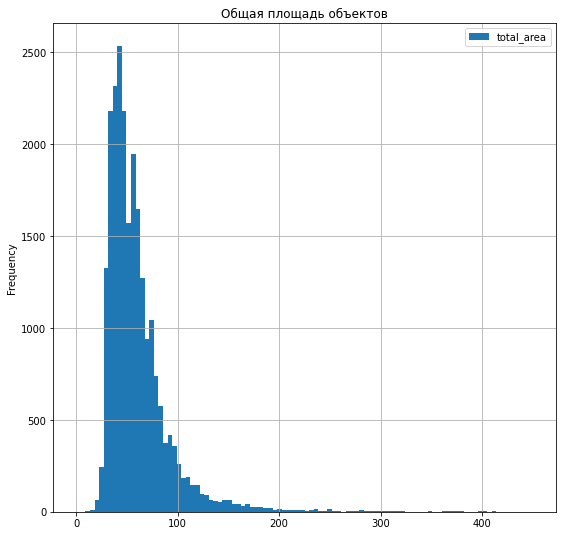

In [16]:
# проанализуем общую площадь объектов
import matplotlib.pyplot as plt
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (9,9), range = (0,450))
plt.title('Общая площадь объектов')
data['total_area'].describe()

Анализ гистограммы общей площади показывает нормальное распределение с небольшими выбросами. Общая площадь  колеблется от 12 до 900 м2, среднее значение 60, а медиана - 52 м2.

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

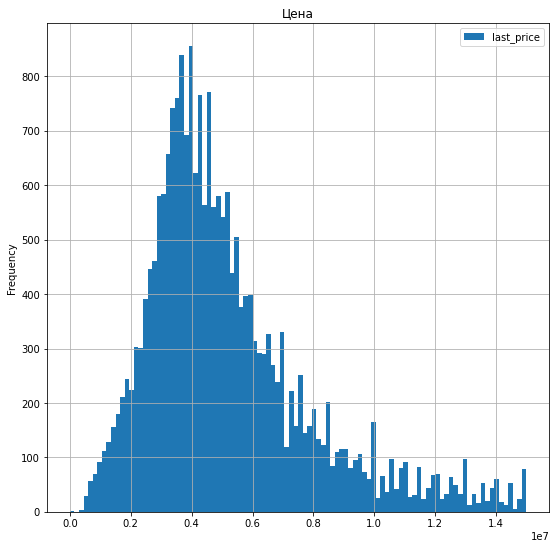

In [17]:
#изучим цену
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (9,9))
plt.title('Цена')
data['last_price'].describe()

Анализ гистограммы цены показывает нормальное распределение с небольшими выбросами. Цены на квартиры изменяются от 0,012 млн. руб. до 763 млн. руб., среднее стоимость составляет 6,54 млн. руб., медиана -  4,65 млн. руб.

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

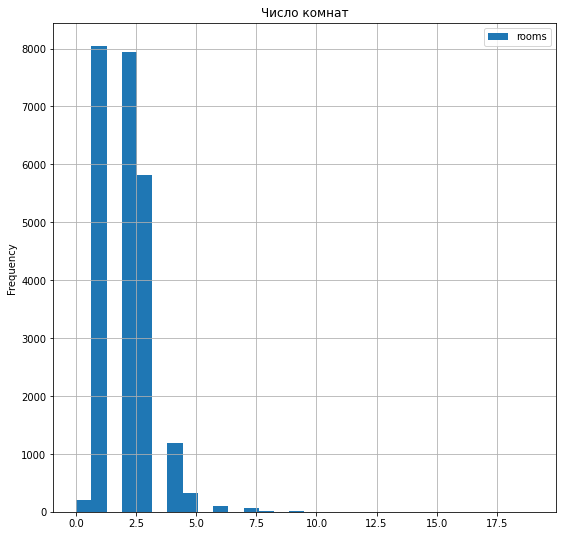

In [18]:
#проаналируем число комнат
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (9,9))
plt.title('Число комнат')
data['rooms'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

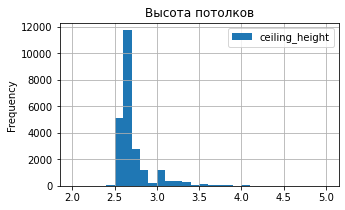

In [19]:
#изучим высоту потолков
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,5), grid=True, figsize = (5,3))
plt.title('Высота потолков')
data['ceiling_height'].describe()

Анализ гистограммы высоты потолков показывает нормальное распределение. Высота потолков колеблется от 1 до 100 м (скорее ошибка), среднее значение 2,7 м, а медиана - 2.65 м.

Проанализируем время продажи квартиры. Предположим, что сколько дней было размещено объявление соответствует времени продажи квартир. Построим по days_exposition гистограмму и посчитаем среднее и медиану.

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

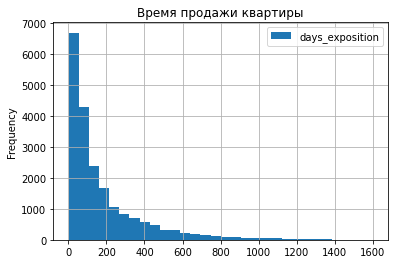

In [20]:
#построим гисторгамму
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
plt.title('Время продажи квартиры')

#выдедем среднее значение и медиану, отбросив нулевые значения
data[data['days_exposition']!=0]['days_exposition'].describe()

Анализ гистограммы показал нормальное распределение. Среднее значение - 180 дней, а медиана - 95 дней. 
Для детального анализа выбросов сделаем гистограмму со значениями от 0 до 200 и количеством корзин 100, а также посчитаем методом value_counts наиболее популярное количество дней до снятия объявления.

45      880
60      538
7       234
30      208
90      204
       ... 
1112      1
1080      1
1064      1
1032      1
1391      1
Name: days_exposition, Length: 1141, dtype: int64

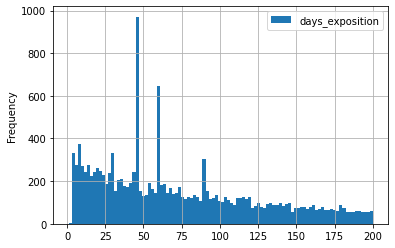

In [21]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))
data[data['days_exposition']!=0]['days_exposition'].value_counts()

Таким образом, выявлены аномалии на 45, 60, 7, 30, 90 днях - это наиболее популярное количество дней до снятия объявления.

Для визуального анализа характеристики распределения времени продаж построем диаграмму размаха.

(1.0, 700.0)

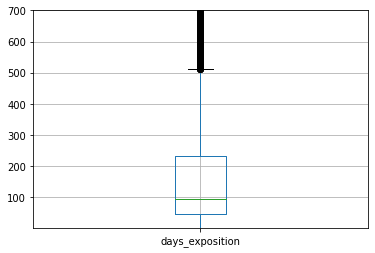

In [22]:
data[data['days_exposition']!=0].boxplot('days_exposition')
plt.ylim(1,700)

Исходя из метода describe, межквартильный размах - от 45 до 232 дней, исходя из диаграммы размаха разница между минимальным значение и максимальным примерно 500 дней. Значит необоснованно быстрых продаж и необоснованно долгих (500 дней и больше) нет. Значит нормальные значения лежат от 1 до 500.

Уберем редкие и выбивающиеся значения во времени продажи квартиры.

count    18454.000000
mean       195.803349
std        226.760010
min          1.000000
25%         44.000000
50%        114.000000
75%        259.000000
max       1580.000000
Name: days_exposition, dtype: float64

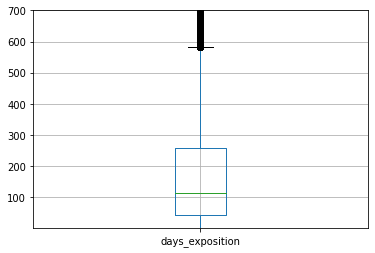

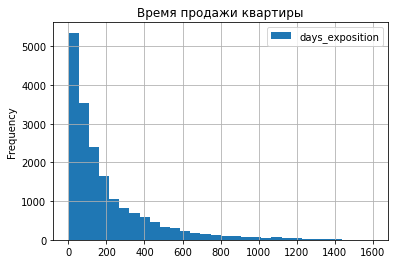

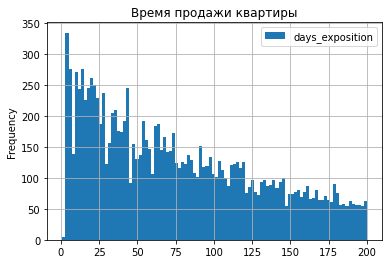

In [23]:
#отфильтруем данные от аномалий и запишем их в новый датафрейм good_data
good_data = data.query('days_exposition != 30 and days_exposition != 60 and days_exposition != 90 and days_exposition != 7 and days_exposition != 45 and days_exposition != 45 and days_exposition != 0')

#построим диаграмму размаха
good_data.boxplot('days_exposition')
plt.ylim(1,700)


#построим гистограммы
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
plt.title('Время продажи квартиры')
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))
plt.title('Время продажи квартиры')

#выведем среднее значение, медиану 
good_data['days_exposition'].describe()

Таким образом, в очищенных данных получаем большие значения медианы и среднего значения - 114 и 195 соответственно, вместо 95 и 180. Аналогично нормальные значения располагаются от 1 до 600 дней вместо от 1 до 500 дней.

Проведем анализ, какие факторы больше всего влияют на стоимость квартиры. Изучим, зависит ли цена квадратного метра от общей площади квартиры, числа комнат, этажа (первого или последнего), удалённости от центра и даты размещения: дня недели, месяца и года. Построим соответствующие графики и сводные таблицы для анализа факторов, влияющих на цену.

,median
total_area,
12.0,200000.0
13.0,142307.0
13.2,127727.0
14.0,85000.0
15.0,114999.5
15.5,158064.0
16.0,131250.0
17.0,99999.5
17.2,119186.0


0.30196014387792547

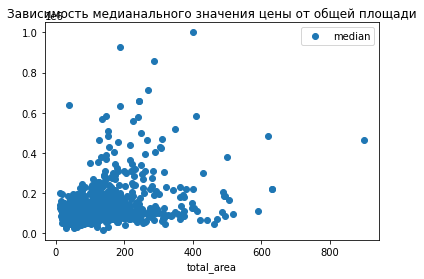

In [24]:
#анализ зависимости цены квадратного метра от общей площади квартиры, 
#создадим переменную pivot_table_total_area с данными для анализа
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'price_one_sqr_m', aggfunc = 'median')
pivot_table_total_area.columns = ['median']
display(pivot_table_total_area.head(10))

#построим график зависимости медианального значения цены от общей площади
pivot_table_total_area.plot(y = 'median', style = 'o')
plt.title('Зависимость медианального значения цены от общей площади')

#рассчитаем коэффициент корреляции цены квадратного метра и общей площади квартиры
data['total_area'].corr(data['price_one_sqr_m'])

Таким образом, зависимость между ценой квадратного метра и общей площадью минимальна (коэффициент корреляции Пирсона - 0.3). Также из графика видно, что больше площадь, тем немного выше стоимость.

,count,median
rooms,,
0,197,105555.0
1,8047,100000.0
2,7940,92796.0
3,5814,88983.0
4,1180,92666.0
5,326,96516.5
6,105,99411.0
7,59,108827.0
8,12,106760.0


0.0554194996705922

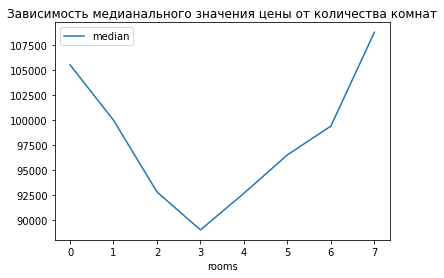

In [25]:
#анализ зависимости цены квадратного метра от количества комнат 
#создадим переменную pivot_table_total_rooms с данными для анализа
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'price_one_sqr_m', aggfunc = ['count','median'])
pivot_table_rooms.columns = ['count','median']
display(pivot_table_rooms)

#построим график зависимости медианального значения цены от количества комнат, отбросив группы с минимальным количеством
pivot_table_rooms.query('count > 12').plot(y = 'median')
plt.title('Зависимость медианального значения цены от количества комнат')

#рассчитаем коэффициент корреляции цены квадратного метра и количество комнат
data['rooms'].corr(data['price_one_sqr_m'])

Таким образом, зависимость между ценой квадратного метра и количеством комнат отсутствует (корреляции Пирсона - 0.05). Также из графика видно, самый дешевый квадратный метр у трехкомнатных квартир.

,median
floor_category,
первый этаж,81223
последни этаж,87777


Text(0.5, 1.0, 'Зависимость медианального значения цены от этажа')

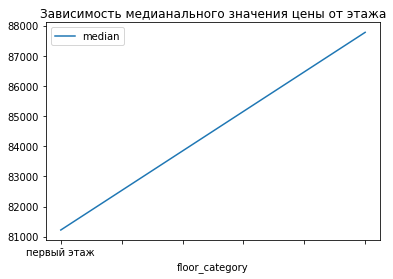

In [26]:
#анализ зависимости цены квадратного метра от этажа 
#создадим переменную pivot_table_floor_category с данными для анализа
pivot_table_floor_category = data.query('floor_category != "другой этаж"').pivot_table(index = 'floor_category', values = 'price_one_sqr_m', aggfunc = 'median')
pivot_table_floor_category.columns = ['median']
display(pivot_table_floor_category.head(10))

#построим график зависимости медианального значения цены от этажа
pivot_table_floor_category.plot(y = 'median')
plt.title('Зависимость медианального значения цены от этажа')

Таким образом, согласно графику, квартиры на первом этаже дешевле квартир на последнем этаже.

-0.3179507368286467

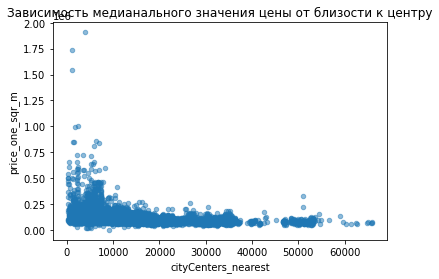

In [27]:
#анализ зависимости цены квадратного метра от близости к центру
#построим график зависимости медианального значения цены от близости к центру
data.plot(kind = 'scatter', y = 'price_one_sqr_m', x = 'cityCenters_nearest', alpha = 0.5)
plt.title('Зависимость медианального значения цены от близости к центру')

#рассчитаем коэффициент корреляции цены квадратного метра и расстояние до центра
data['cityCenters_nearest'].corr(data['price_one_sqr_m'])

Таким образом, видна зависимость стоимости квадратного метра от близости к центру: чем ближе к центру, тем выше стоимость. Это также подтверждает отрицательное значение коэффициента корреляции.

,median
weekday_exposition,
1,95634.0
2,95473.0
3,95143.0
0,94688.0
4,94616.0
6,94501.0
5,93545.5


Text(0.5, 1.0, 'Зависимость медианального значения цены от дня размещения обьявление')

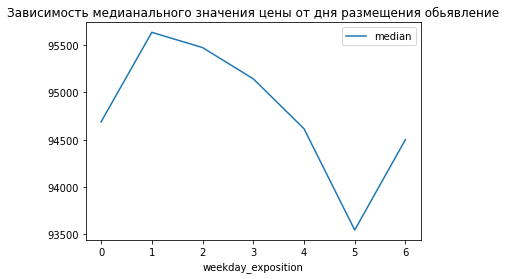

In [28]:
#анализ зависимости цены квадратного метра от дня размещения обьявление
#создадим переменную pivot_table_weekday с данными для анализа
pivot_table_weekday = data.pivot_table(index = 'weekday_exposition', values = 'price_one_sqr_m', aggfunc = 'median')
pivot_table_weekday.columns = ['median']
display(pivot_table_weekday.sort_values('median', ascending = False))

#построим график зависимости медианального значения цены от дня размещения обьявление
pivot_table_weekday.plot(y = 'median')
plt.title('Зависимость медианального значения цены от дня размещения обьявление')

Из графика видно, что ко вторнику выставляются объявления с большей стоимостью, а в субботу - с минимальной. 

,median
month_exposition,
4,96451
8,96026
9,95607
11,95588
3,95238
1,95222
2,95000
7,95000
12,94262


Text(0.5, 1.0, 'Зависимость медианального значения цены от месяца размещения обьявление')

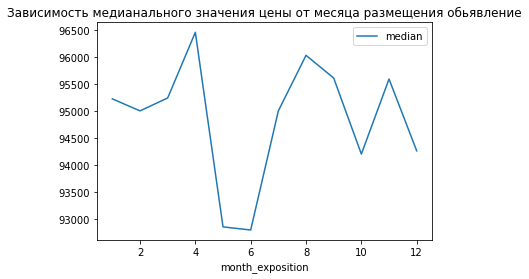

In [29]:
#анализ зависимости цены квадратного метра от месяца размещения обьявление
#создадим переменную pivot_table_month с данными для анализа
pivot_table_month = data.pivot_table(index = 'month_exposition', values = 'price_one_sqr_m', aggfunc = 'median')
pivot_table_month.columns = ['median']
display(pivot_table_month.sort_values('median', ascending = False))

#построим график зависимости медианального значения цены от месяца размещения обьявление
pivot_table_month.plot(y = 'median')
plt.title('Зависимость медианального значения цены от месяца размещения обьявление')

Таким образом, самая высокая стоимость квадратного метра в апреле, самая низкая - в июне. 

,median
year_exposition,
2014,107000.0
2019,103305.0
2018,95689.0
2015,93414.0
2017,92564.5
2016,91743.0


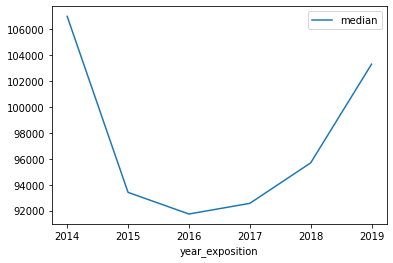

In [30]:
#анализ зависимости цены квадратного метра от года размещения обьявление
#создадим переменную  pivot_table_year с данными для анализа
pivot_table_year = data.pivot_table(index = 'year_exposition', values = 'price_one_sqr_m', aggfunc = 'median')
pivot_table_year.columns = ['median']
display(pivot_table_year.sort_values('median', ascending = False))

#построим график зависимости медианального значения цены от года размещения обьявление
pivot_table_year.plot(y = 'median')
plt.show('Зависимость медианального значения цены от года размещения обьявления')

Таким образом, в период с 2014 до 2016 года цена падала, а затем начала увеличиваться.

Проведем анализ 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья. 

In [31]:
pivot_table_locality = data.pivot_table(index = 'locality_name', values = 'price_one_sqr_m', aggfunc=['count', 'mean'])
pivot_table_locality.columns = ['count', 'mean']
#10 населённых пунктов с наибольшим числом объявлений
pivot_table_locality = pivot_table_locality.sort_values('count', ascending = False).head(10)
display(pivot_table_locality)

,count,mean
locality_name,,
Санкт-Петербург,15721,114848.565231
посёлок Мурино,522,85751.733716
посёлок Шушары,440,78676.904545
Всеволожск,398,68654.007538
Пушкин,369,103125.373984
Колпино,338,75424.150888
посёлок Парголово,327,90175.489297
Гатчина,307,68745.693811
деревня Кудрово,299,92473.086957


Таким образом, самая высокая средняя стоимость жилья из 10 населённых пунктов с самым большим количеством объявлений - в Санкт-Петербурге, самая низкая - в Выборге.

Изучим предложения квартир: определим границу центра

,price_one_sqr_m
cityCenters_nearest_km,
0,187323.674419
1,166603.312500
2,146662.420195
3,129415.891635
4,137475.039691


Text(0.5, 1.0, 'Зависимость зависимости цены от удалённости от центра')

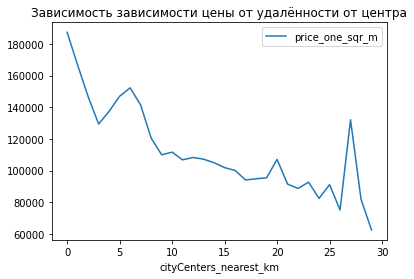

In [32]:
#cоздаем столбец с расстоянием до центра в километрах
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(9999)

#округляем до целых значений
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')

# создаем переменную для расчета средней цены для каждого километра в Санкт-Петербурге
pivot_table_km = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=9999').pivot_table(index = 'cityCenters_nearest_km', values = 'price_one_sqr_m', aggfunc = 'mean')
display(pivot_table_km.head())

# строит график для анализа зависимости цены от удалённости от центра.
pivot_table_km.plot()
plt.title('Зависимость зависимости цены от удалённости от центра')


График сильно меняется на 3 км - это и есть центральная зона.

Проанализируем предложения центральной зоны. Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделием факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 

In [33]:
#выделим квартиры в центре Санкт-Петербург, беря за радиус 3 км
center_spb_data = data.query('cityCenters_nearest_km <= 3 and locality_name == "Санкт-Петербург"')

count    1159.000000
mean       97.399172
std        55.772422
min        12.000000
25%        62.000000
50%        84.100000
75%       115.250000
max       517.000000
Name: total_area, dtype: float64

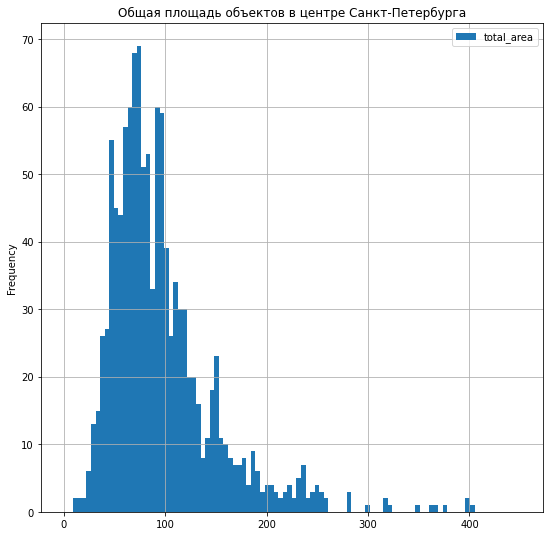

In [34]:
# проанализуем общую площадь объектов
center_spb_data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (9,9), range = (0,450))
plt.title('Общая площадь объектов в центре Санкт-Петербурга')
center_spb_data['total_area'].describe()

Анализ гистограммы общей площади показывает нормальное распределение с небольшими выбросами. Общая площадь колеблется от 12 до 517 м2, среднее значение 97, а медиана - 84 м2.

count    1.159000e+03
mean     1.602257e+07
std      3.292117e+07
min      2.100000e+06
25%      7.000000e+06
50%      9.500000e+06
75%      1.447000e+07
max      7.630000e+08
Name: last_price, dtype: float64

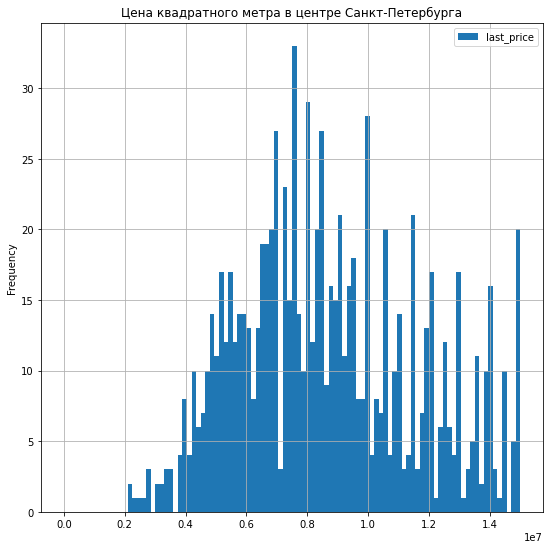

In [35]:
#изучим цену
center_spb_data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (9,9))
plt.title('Цена квадратного метра в центре Санкт-Петербурга')
center_spb_data['last_price'].describe()

Анализ гистограммы цены показывает нормальное распределение с небольшими выбросами. Цены на квартиры изменяются от 2,1 млн. руб. до 763 млн. руб., среднее стоимость составляет 16 млн. руб., медиана -  9,5 млн. руб.

count    1159.000000
mean        3.104400
std         1.558964
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        19.000000
Name: rooms, dtype: float64

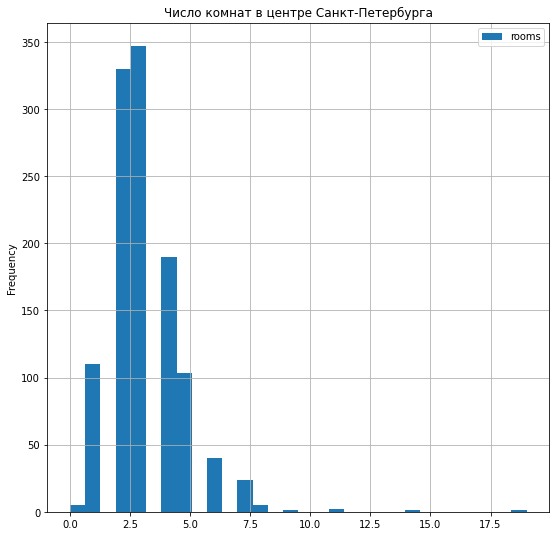

In [36]:
#проаналируем число комнат
center_spb_data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (9,9))
plt.title('Число комнат в центре Санкт-Петербурга')
center_spb_data['rooms'].describe()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Кстати сам график можно было бы сделать пошире и чуть ниже в высоту.
    
</div>

Анализ гистограммы количества комнат показывает нормальное распределение. Количество комнат изменяется от 0 (студии) до 19. Среднее значение/медиана составляет 3 комнаты.

count    1159.000000
mean        3.070699
std         1.175007
min         2.450000
25%         2.650000
50%         3.000000
75%         3.300000
max        32.000000
Name: ceiling_height, dtype: float64

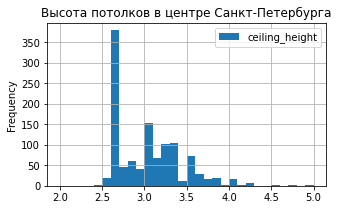

In [37]:
#изучим высоту потолков
center_spb_data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,5), grid=True, figsize = (5,3))
plt.title('Высота потолков в центре Санкт-Петербурга')
center_spb_data['ceiling_height'].describe()

Анализ гистограммы высоты потолков показывает нормальное распределение с небольшими выбросами. Высота потолков колеблется от 2,45 до 32 м, среднее значение 3,07 м, а медиана - 3 м.

,count,median
rooms,,
0,5,131250.0
1,110,133397.5
2,330,122193.5
3,347,111764.0
4,190,105883.0
5,103,101798.0
6,40,95437.0
7,24,119569.0
8,5,116056.0


0.0017673487141106456

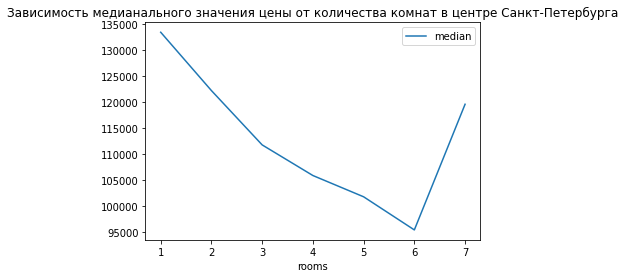

In [38]:
#анализ зависимости цены квадратного метра от количества комнат 
#создадим переменную pivot_table_total_rooms_center_spb с данными для анализа
pivot_table_rooms_center_spb = center_spb_data.pivot_table(index = 'rooms', values = 'price_one_sqr_m', aggfunc = ['count', 'median'])
pivot_table_rooms_center_spb.columns = ['count', 'median']
display(pivot_table_rooms_center_spb)

#построим график зависимости медианального значения цены от количества комнат, отбросив группы с минимальным количеством
pivot_table_rooms_center_spb.query('count > 12').plot(y = 'median')
plt.title('Зависимость медианального значения цены от количества комнат в центре Санкт-Петербурга')

#рассчитаем коэффициент корреляции цены квадратного метра и количество комнат
center_spb_data['rooms'].corr(center_spb_data['price_one_sqr_m'])

Таким образом, зависимость между ценой квадратного метра и количеством комнат отсутствует (коэффициент корреляции Пирсона - 0.002). Также из графика видно, самый дешевый квадратный метр в 19-комнатной квартире. В общей выборке - самый дешевый кв. м у трехкомнатной квартиры.

In [39]:
#анализ зависимости цены квадратного метра от этажа 
#создадим переменную pivot_table_floor_category_center_spb с данными для анализа
pivot_table_floor_category_center_spb = center_spb_data.query('floor_category != "другой этаж"').pivot_table(index = 'floor_category', values = 'price_one_sqr_m', aggfunc = 'median')
pivot_table_floor_category_center_spb.columns = ['median']
display(pivot_table_floor_category_center_spb.head(10))

#построим график зависимости медианального значения цены от этажа

,median
floor_category,
первый этаж,107508.5
последни этаж,114432.0


Таким образом, согласно графику квартиры на первом этаже дешевле квартир на последнем этаже. Аналогично общей тенденции.

-0.16437506633061943

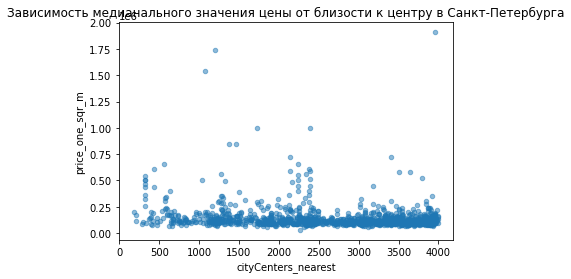

In [40]:
#анализ зависимости цены квадратного метра от близости к центру
#построим график зависимости медианального значения цены от близости к центру
center_spb_data.plot(kind = 'scatter', y = 'price_one_sqr_m', x = 'cityCenters_nearest', alpha = 0.5)
plt.title('Зависимость медианального значения цены от близости к центру в Санкт-Петербурга')

#рассчитаем коэффициент корреляции цены квадратного метра и расстояние до центра
center_spb_data['cityCenters_nearest'].corr(center_spb_data['price_one_sqr_m'])

Таким образом, четкой зависимости стоимости от близости к центру нет, так как выборка по центру города. В общем выборке зависимость цены от близостости прослеживается.

,median
weekday_exposition,
0,121354.0
5,120568.0
4,117984.0
2,114902.5
1,114209.0
6,110843.0
3,110132.0


Text(0.5, 1.0, 'Цена от дня размещения обьявление в центре С.-Петербурга')

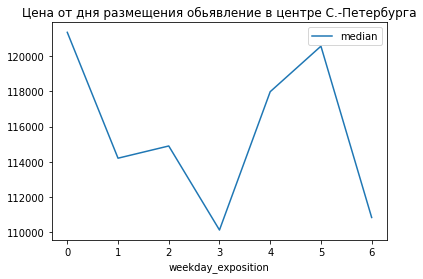

In [41]:
#анализ зависимости цены квадратного метра от дня размещения обьявление
#создадим переменную pivot_table_weekday_center_spb с данными для анализа
pivot_table_weekday_center_spb = center_spb_data.pivot_table(index = 'weekday_exposition', values = 'price_one_sqr_m', aggfunc = 'median')
pivot_table_weekday_center_spb.columns = ['median']
display(pivot_table_weekday_center_spb.sort_values('median', ascending = False))

#построим график зависимости медианального значения цены от дня размещения обьявление
pivot_table_weekday_center_spb.plot(y = 'median')
plt.title('Цена от дня размещения обьявление в центре С.-Петербурга')

Из графика видно, что в понедельник и субботу выставляются объявления с большей стоимостью, а в четверг - с минимальной. Общая тенденция немного отличается: ко вторнику выставляются объявления с большей стоимостью, а в субботу - с минимальной. 

,mean,count,median
month_exposition,,,
4,168982.870690,116,123094.5
10,143129.021277,94,121978.0
12,162849.843373,83,121568.0
3,149574.508475,118,117409.0
1,147760.090909,77,117244.0
2,141960.713178,129,116406.0
9,155581.594059,101,116054.0
11,136308.390244,123,112639.0
7,137694.565657,99,112195.0


Text(0.5, 1.0, 'Зависимость цены от мес. размещения обьявление в центре Санкт-Петербурга')

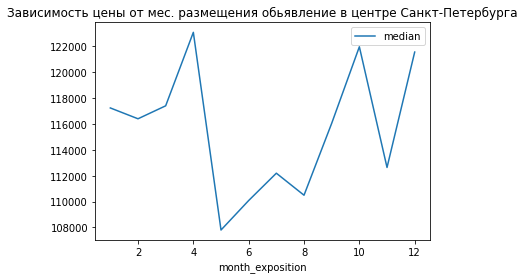

In [42]:
#анализ зависимости цены квадратного метра от месяца размещения обьявление
#создадим переменную pivot_table_month_center_spb с данными для анализа
pivot_table_month_center_spb = center_spb_data.pivot_table(index = 'month_exposition', values = 'price_one_sqr_m', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_center_spb.columns = ['mean', 'count', 'median']
display(pivot_table_month_center_spb.sort_values('median', ascending = False))

#построим график зависимости медианального значения цены от месяца размещения обьявление
pivot_table_month_center_spb.plot(y = 'median')
plt.title('Зависимость цены от мес. размещения обьявление в центре Санкт-Петербурга')

Самая низкая стоимость квадратного метра в центре Санкт-Петербурга наблюдалась мае, а высокая - в апреле. В общей выборке тенденция аналогична: самая высокая стоимость квадратного метра в апреле, самая низкая - июнь. 

,mean,count,median
year_exposition,,,
2014,253598.222222,9,260000
2019,173593.070866,127,131432
2018,140129.402941,340,117898
2017,141410.263158,418,114579
2016,135592.863946,147,109090
2015,154054.330508,118,107055


Text(0.5, 1.0, 'Зависимость цены от года размещения обьявление в центре Санкт-Петербурга')

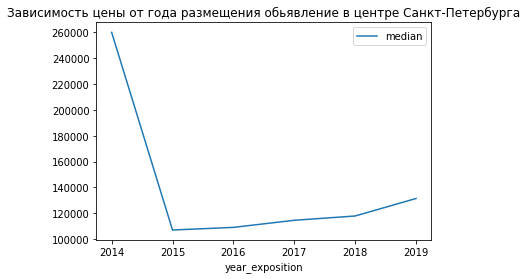

In [43]:
#анализ зависимости цены квадратного метра от года размещения обьявление
#создадим переменную  pivot_table_year_center_spb с данными для анализа
pivot_table_year_center_spb = center_spb_data.pivot_table(index = 'year_exposition', values = 'price_one_sqr_m', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_center_spb.columns = ['mean', 'count', 'median']
display(pivot_table_year_center_spb.sort_values('median', ascending = False))

#построим график зависимости медианального значения цены от года размещения обьявление
pivot_table_year_center_spb.plot(y = 'median')
plt.title('Зависимость цены от года размещения обьявление в центре Санкт-Петербурга')

Таким образом, самая высокая цена была в 2014, затем резкий спад и медленный рост. В целой базе подъем цены был быстрее.

## Общий вывод

Таким образом, проанализировав архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет было выявлено:
1. Цена 1 кв. метра, площадь квартиры, количество комнат и высота потолков в выборке показывает нормальное распределение.
2. Нормальные значения времени продажи квартир варьируются от 1 до 600 дней. Отсутствуют необоснованно быстрые продажи или долгие.
3. На цену квадратного метра квартиры больше всего влияют этаж квартиры и близость к центру. Незначительно влияет общая площадь.
4. Ко вторнику выставляются объявления с большей стоимостью кв. метра, а в субботу - с минимальной. Самая высокая стоимость квадратного метра в апреле, самая низкая - в июне. В период с 2014 до 2016 года цена кв. метра падала, а затем начала увеличиваться.
5. Самая высокая средняя стоимость жилья из 10 населённых пунктов с самым большим количеством объявлений - в Санкт-Петербурге, самая низкая - в Выборге.
6. В Санкт-Петербурге в центре также на цену квадратного метра квартиры больше всего влияют этаж квартиры и близость к центру. Остальные зависимости отличны: в понедельник и субботу выставляются объявления с большей стоимостью, а в четверг - с минимальной, самая низкая стоимость квадратного метра - в мае, а высокая - в апреле, подъем с 2015 - 2016 более медленным.

Для дальнейшего анализа рекомендуется провести анализ с географической сегментацией. Анализ одного сегмента (В Санкт-Петербурге в центре) показал, что при сегментации тенденции могут отличается от средних показателей по рынку.